In [128]:
import shutil
from urllib.request import Request, urlopen, urlretrieve
from io import BytesIO
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from pandas import DataFrame
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

In [129]:
XLSX_URL = "https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquotenmonitoring.xlsx?__blob=publicationFile"
PATH = "data.xlsx"

request = Request(XLSX_URL, headers={'User-Agent': 'Mozilla/5.0'})
f = urlopen(request).read()

wb = load_workbook(filename=BytesIO(f), read_only=True, data_only=True)

vaccination_sheet = wb["Impfungen_proTag"]
df = DataFrame(vaccination_sheet.values)
wb.close()


In [130]:
new_header = df.iloc[0]
new_header[3] = "Gesamt"
df = df[1:]
df.columns = new_header


In [131]:
df["Datum"] = pd.to_datetime(df["Datum"], errors='coerce')

In [132]:
df = df[df["Datum"].notnull()]

In [133]:
df = df.set_index("Datum")

In [134]:
df.head()

,Erstimpfung,Zweitimpfung,Gesamt
Datum,,,
2020-12-27,23900,0,23900
2020-12-28,19834,0,19834
2020-12-29,43414,0,43414
2020-12-30,57755,0,57755
2020-12-31,38057,0,38057


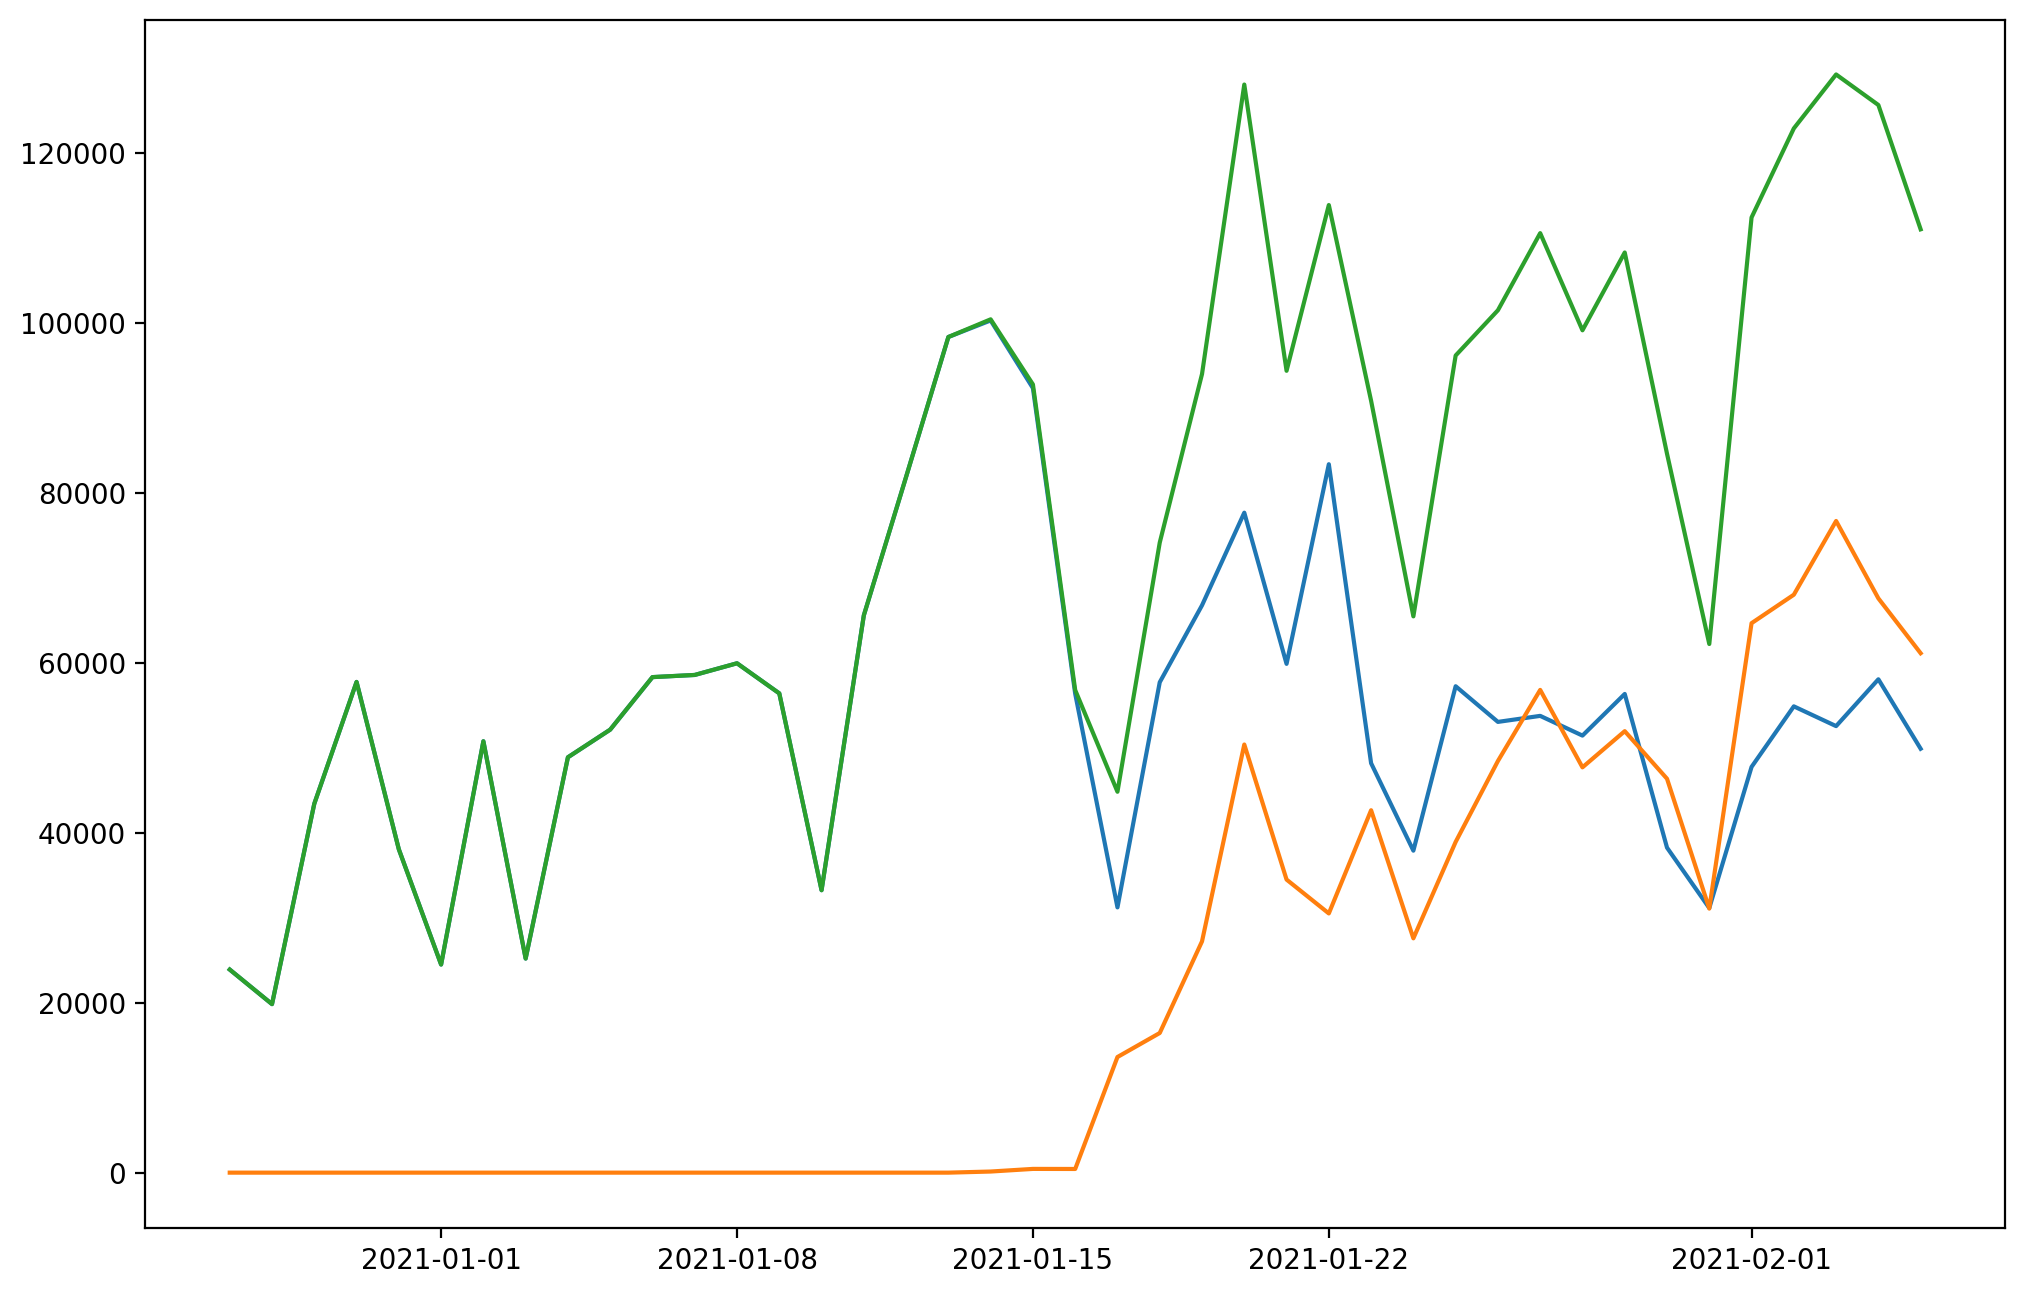

In [135]:
plt.plot(df)

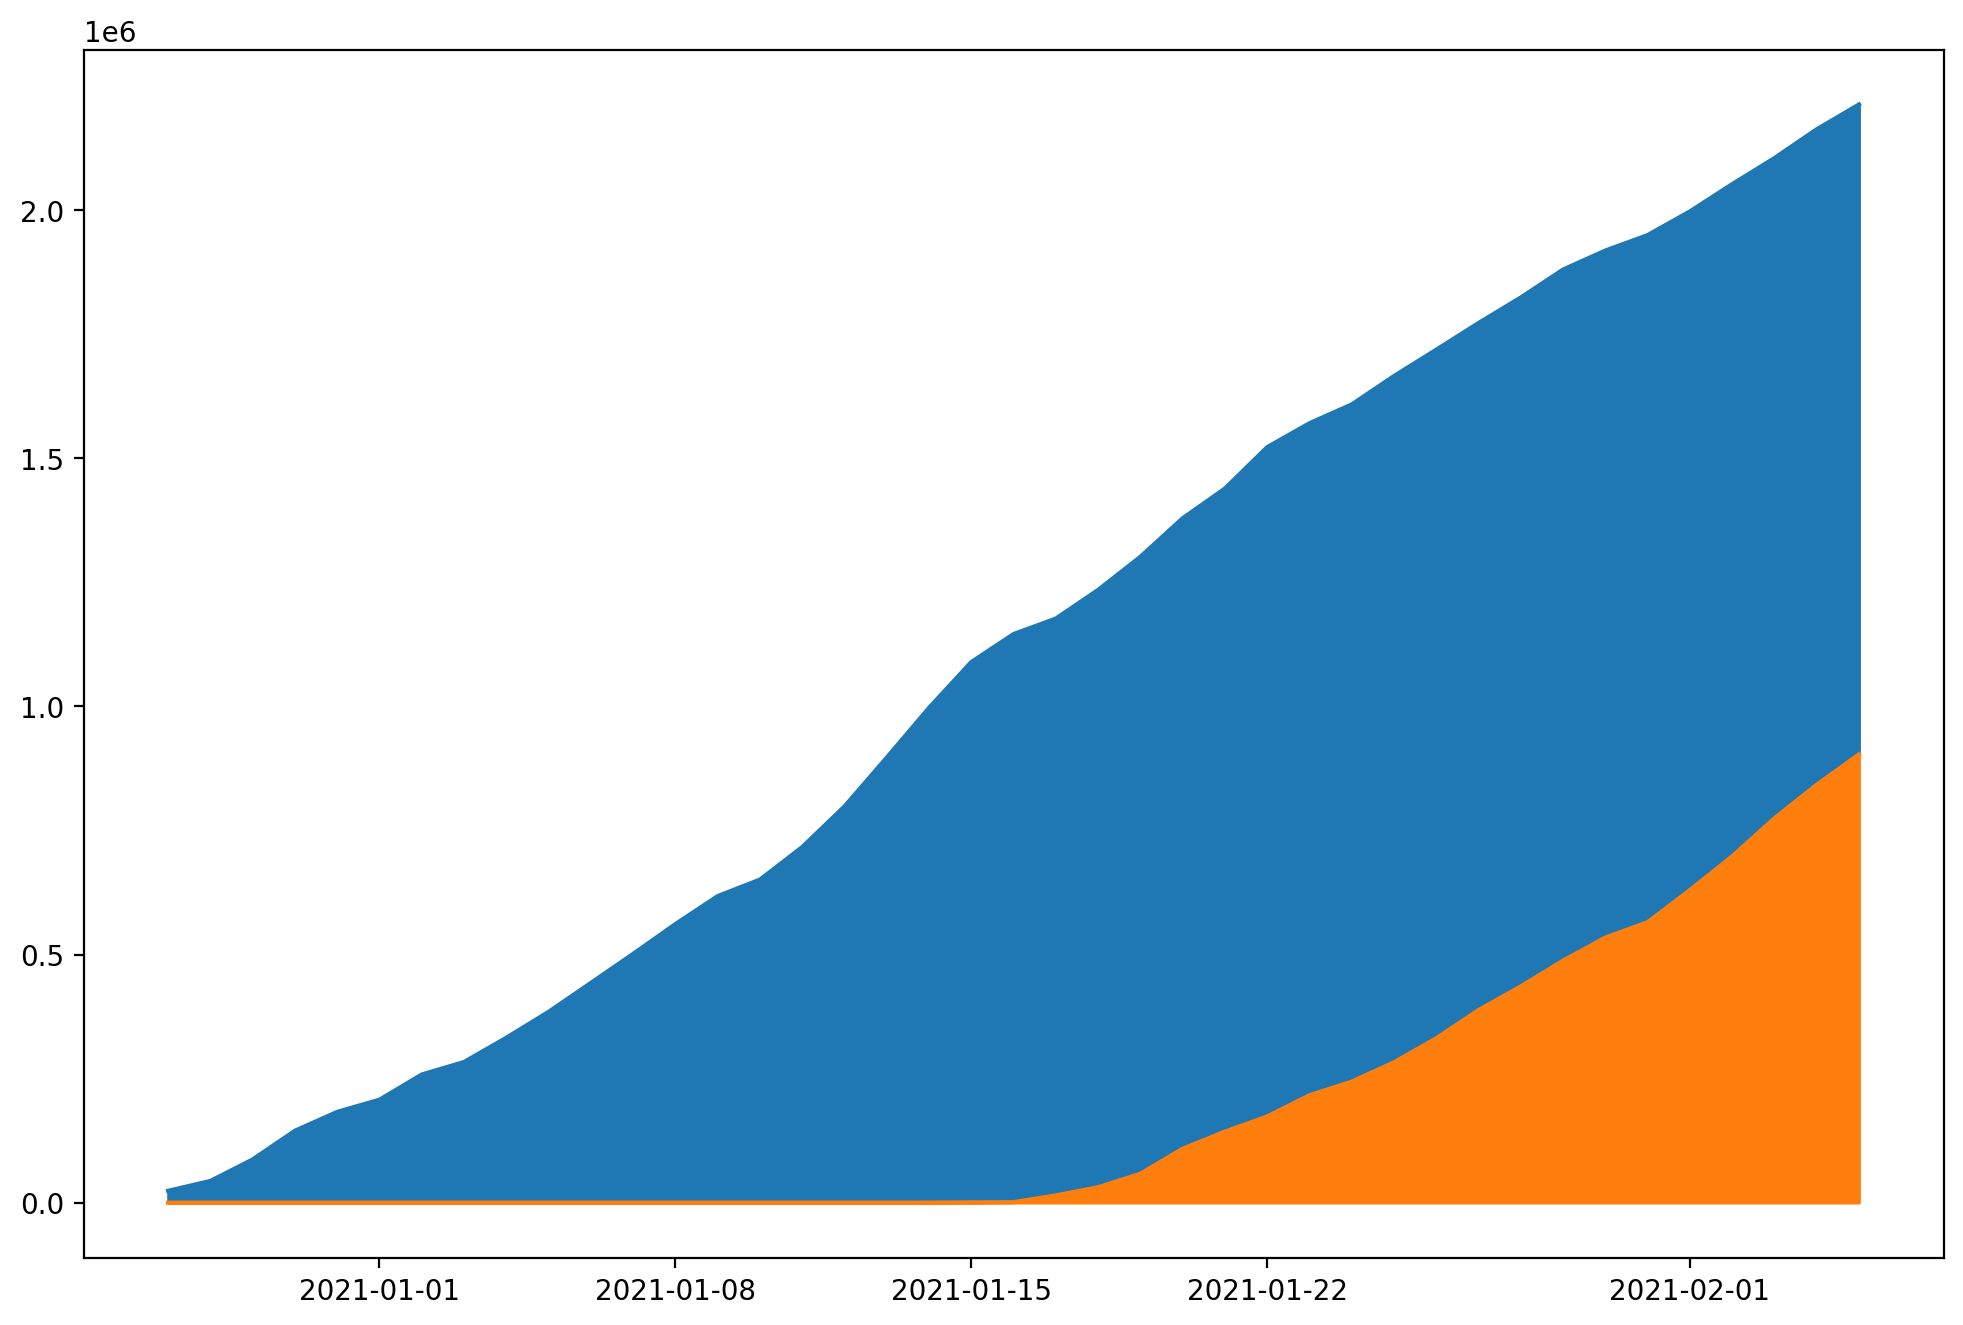

In [136]:
df_cumsum = df.cumsum()
plt.plot(df_cumsum[["Erstimpfung", "Zweitimpfung"]])
plt.fill_between(df_cumsum.index.to_numpy(), df_cumsum["Zweitimpfung"].to_numpy("int"), df_cumsum["Erstimpfung"].to_numpy("int"), color="tab:blue")
plt.fill_between(df_cumsum.index.to_numpy(), 0, df_cumsum["Zweitimpfung"].to_numpy("int"), color="tab:orange")
